In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, utils, viz

In [3]:
os.environ['WANDB_MODE'] = 'dryrun'

In [4]:
p, n_examples, n_samples = model.HParams(n_audio_chans=1, dilation_stacks=2), 2**4, 4
X = audio.load_dataset_from_track('data/steinway.wav', p)[:n_examples]
X, X_test = utils.preprocess(X, p)

In [5]:
m = model.Wavenet(p)
t = train.Trainer(m, X, X_test, train.HParams(max_epochs=10, batch_size=8, num_workers=8, ckpt_path='checkpoints'), None)

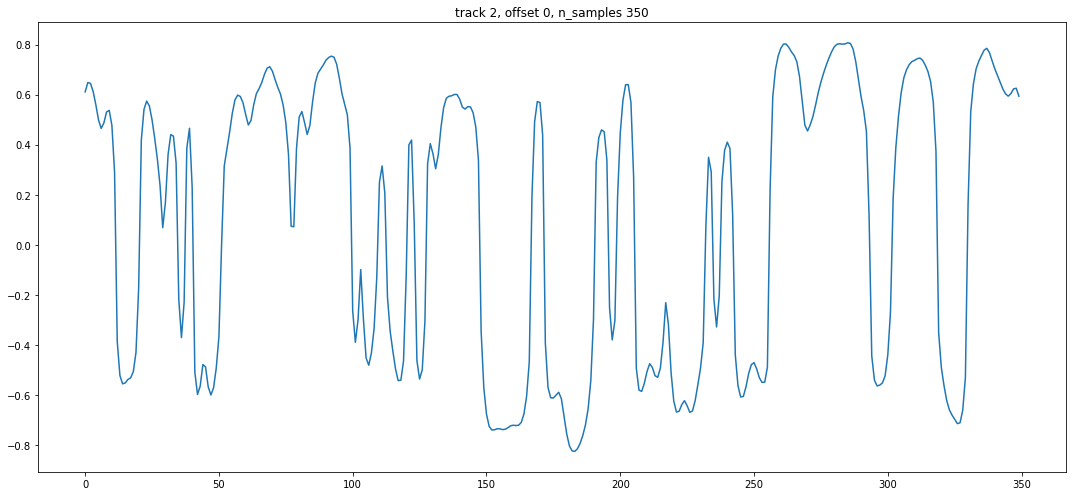

In [6]:
track_i = viz.plot_track(X)

In [7]:
ipd.Audio(audio.load_raw('data/steinway.wav')[0], rate=p.sampling_rate)

In [8]:
ipd.Audio(X[track_i].squeeze(), rate=p.sampling_rate)

In [ ]:
t.train()

wandb: Offline run mode, not syncing to the cloud.
wandb: W&B is disabled in this directory.  Run `wandb on` to enable cloud syncing.
  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
_, track = sample.sample(m, 100)

In [ ]:
viz.plot_track(track, n_samples=250000)

In [ ]:
ipd.Audio(track[0].squeeze(), rate=p.sampling_rate)

In [ ]:
X = librosa.stft(track[0].squeeze())
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')